In [5]:
#3D Ising

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialstate(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(N,N,N))-1
    return state



def mcmove(config, beta, h):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                c = np.random.randint(0, N)
                s =  config[a, b, c]
                nb = config[(a+1)%N,b,c] + config[a,(b+1)%N ,c] + config[a, b , (c+1)%N] + config[(a-1)%N,b,c] + config[a,(b-1)%N ,c] + config[a, b , (c-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif np.random.rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b, c] = s
    return config


def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)/N
    return mag

In [6]:
nt      = 50         #  number of temperature points
N       = 20      #  size of the lattice, N x N
eqSteps = 2**8      #  number of MC sweeps for equilibration
mcSteps = 2**10      #  number of MC sweeps for calculation
h = 0                #  No magnetic field


beta = np.linspace(0, 0.5, nt)
M = np.zeros(nt)

In [7]:

for num, b in enumerate(tqdm(beta)):
    config = initialstate(N)         # initialise

    M1 = 0
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, b, h)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, b, h)           
        M1 += calcMag(config)        # calculate the magnetisation


    # divide by number of sites and iteractions to obtain intensive values    
    M[num] = M1/(mcSteps*N*N) 
    

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [3:04:55<00:00, 221.91s/it]


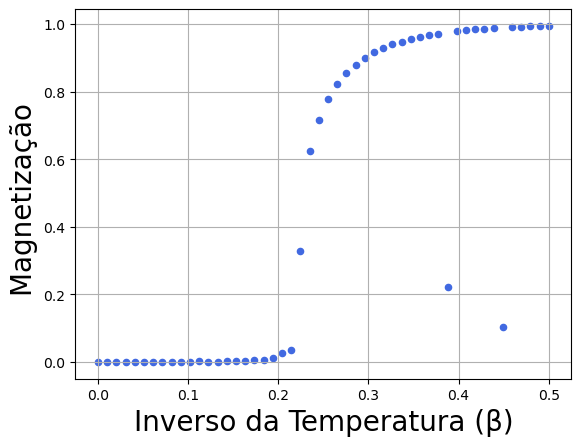

In [8]:

plt.scatter(beta, abs(M), s=20, marker='o', color='RoyalBlue')
plt.xlabel("Inverso da Temperatura (\u03B2)", fontsize=20)
plt.ylabel("Magnetização ", fontsize=20)   
plt.axis('tight')
plt.grid()
plt.savefig('transição2')